In [27]:
suppressPackageStartupMessages({
    library(fgsea)
    library(data.table)
    library(ggplot2)
    library(factoextra)
    # library(tidyverse)
    library(grid)
    library(shadowtext)
    library(gridExtra)
    library(lattice)
    library(tictoc)



    library(dplyr)
    library(Matrix)
    library(data.table)
    library(stringr)
    library(tidyr)
    library(readr)
    library(reshape2)
    library(gridExtra)
    library(ggplot2)
    library(ggrepel)
    library(ggpubr)
    library(ggthemes)
    library(RColorBrewer)
    library(patchwork)
    library(cowplot)
    library(ggrastr)
    # library(forcats)

    # library(future)
    library(tictoc)

    library(tidyverse)
})
set.seed(42)

In [3]:

# # suppressPackageStartupMessages(library(goseq))
# # suppressPackageStartupMessages(library(org.Hs.eg.db))
# suppressPackageStartupMessages(library(dplyr))

# suppressPackageStartupMessages({
#      library(Seurat)
# #      library(Signac)
# #     library("MAST")
#     library(dplyr)
#     library(ggplot2)
# #     library(DESeq2)
# #     library(MAST)
# #     library(EnsDb.Hsapiens.v86)
#     library(dplyr)
#     library(ggplot2)
#     library(ggrepel)
#     library(Matrix)
# #     library(harmony)
# #     library(data.table)
# #     library(ggpubr)
# #     library(tictoc)
# #     library(hdf5r)
# #     library(ggthemes)
#     library(RColorBrewer)
# #     library(patchwork)
# #     library(GenomicRanges)
# #     library(future)
#     library(cowplot)
# #     library(limma)
# #     library(scater)
# # #     library(SeuratDisk)
# })

# suppressPackageStartupMessages(library(dplyr))
# suppressPackageStartupMessages(library(stringr))
# suppressPackageStartupMessages(library(data.table))
# suppressPackageStartupMessages(library(tidyr))
# suppressPackageStartupMessages(library(tximport))
# suppressPackageStartupMessages(library(readr))
# suppressPackageStartupMessages(library(DESeq2))
# suppressPackageStartupMessages(library(EnsDb.Hsapiens.v86))
# suppressPackageStartupMessages(library(AnnotationHub))
# suppressPackageStartupMessages(library(ggplot2))
# suppressPackageStartupMessages(library(ggrepel))
# suppressPackageStartupMessages(library(pheatmap))
# suppressPackageStartupMessages(library(RColorBrewer))
# suppressPackageStartupMessages(library(forcats))
# suppressPackageStartupMessages(library(goseq))
# suppressPackageStartupMessages(library(geneLenDataBase))
# suppressPackageStartupMessages(library(org.Hs.eg.db))
# suppressPackageStartupMessages(library(clusterProfiler))
# suppressPackageStartupMessages(library(enrichplot))
# suppressPackageStartupMessages(library(DOSE))
# suppressPackageStartupMessages(library(ggpubr))
# suppressPackageStartupMessages(library(TxDb.Hsapiens.UCSC.hg38.knownGene))
# # library(tidyverse)
# # library(hrbrthemes)
# # library(tm)
# # library(proustr)

# Read in Results 

In [3]:
indir = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/GSEA/'
scOutDir = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/figures/'
outdir = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/GSEA/redo_sc/'
celltypes2 = c('acinar', 
               'alpha', 'beta', 'delta', 'ductal', 
               'gamma', 
               'stellate')

In [5]:
resList = list()
for (cell in celltypes2){
    filename = paste0(indir, 'GSEA_results_from_fGSEA.', cell, '.ALL_PATHWAYS.results.withLabel.wGeneLists.rds')
    tic(cell)
    resList[[cell]] <- readRDS(filename)
    toc()
}



acinar: 0.201 sec elapsed
alpha: 0.177 sec elapsed
beta: 0.137 sec elapsed
delta: 0.128 sec elapsed
ductal: 0.164 sec elapsed
gamma: 0.154 sec elapsed
stellate: 0.156 sec elapsed


In [6]:
resListFilt = list()

for (cell in celltypes2){
    tic(cell)
   resListFilt[[cell]] <- resList[[cell]] %>%
                  filter(str_detect(pathway, "^REACTOME|^KEGG|^HALLMARK"))
    toc()
}

for (cell in celltypes2){
   print(cell)
    print(dim(resListFilt[[cell]] ))
}

 

acinar: 0.075 sec elapsed
alpha: 0.012 sec elapsed
beta: 0.011 sec elapsed
delta: 0.011 sec elapsed
ductal: 0.01 sec elapsed
gamma: 0.01 sec elapsed
stellate: 0.01 sec elapsed
[1] "acinar"
[1] 1862    9
[1] "alpha"
[1] 1887    9
[1] "beta"
[1] 1885    9
[1] "delta"
[1] 1875    9
[1] "ductal"
[1] 1877    9
[1] "gamma"
[1] 1860    9
[1] "stellate"
[1] 1858    9


In [7]:
beta <- resListFilt[['beta']]
rownames(beta) = beta$pathway
beta$LOG10P = -log10(beta$pval)
beta_sig <- beta %>% filter(pval < .05)
dim(beta_sig)
# beta_sig_resUp <- beta_sig[which(beta_sig$NES > 0),]
# beta_sig_resDown <- beta_sig[which(beta_sig$NES < 0),]

# beta_sig_resUp_filt <- beta_sig_resUp[which(beta_sig_resUp$PathwayTotalSize <= 600),]
# beta_sig_resDown_filt <- beta_sig_resDown[which(beta_sig_resDown$PathwayTotalSize <= 600),]

# beta_sig_resUp_filt_order <-  beta_sig_resUp_filt %>%
# arrange(desc(LOG10P))

# beta_sig_resDown_filt_order <-  beta_sig_resDown_filt %>%
# arrange(desc(LOG10P))

[1] 384  10

In [8]:
NUM_PATHWAYS_TO_PLOT = 20 # number of pathways to plot for each up or down 

In [9]:
tic()
go <- gmtPathways('/nfs/lab/relgamal/MAGMA/c5.go.v2023.1.Hs.symbols.gmt')
go_mf <- gmtPathways('/nfs/lab/relgamal/MAGMA/c5.go.mf.v2023.1.Hs.symbols.gmt.txt')
go_bp <- gmtPathways('/nfs/lab/relgamal/MAGMA/c5.go.bp.v2023.1.Hs.symbols.gmt.txt')
go_cc <- gmtPathways('/nfs/lab/relgamal/MAGMA/c5.go.cc.v2023.1.Hs.symbols.gmt.txt')
kegg <- gmtPathways('/nfs/lab/relgamal/MAGMA/c2.cp.kegg.v2023.1.Hs.symbols.gmt')
reactome <- gmtPathways('/nfs/lab/relgamal/MAGMA/c2.cp.reactome.v2023.1.Hs.symbols.gmt')

pathways <- c(go, kegg, reactome)
pathways2 <- c(go_bp,kegg,reactome)
all_go <- c(go_mf, go_bp, go_cc)
all_pathways <- c(go_mf, go_bp, go_cc, kegg, reactome)
toc()

2.235 sec elapsed


In [10]:
 hallmark_genes <-  gmtPathways('/nfs/lab/relgamal/MAGMA/h.all.v2023.1.Hs.symbols.gmt.txt')

In [11]:
pathways_Obj_List = list()
# pathways_Obj_List[['GO']] = go
# pathways_Obj_List[['GOMF']] = go_mf
# pathways_Obj_List[['GOBP']] = go_bp
# pathways_Obj_List[['GOCC']] = go_cc
pathways_Obj_List[['KEGG']] = kegg
pathways_Obj_List[['REACTOME']] = reactome
pathways_Obj_List[['ALL_PATHWAYS']] = all_pathways
pathways_Obj_List[['HALLMARK_GENES']] = hallmark_genes

In [12]:
rpl <- fread('/nfs/lab/relgamal/MAGMA/group-646.csv', fill=TRUE, header=TRUE)
rps <- fread('/nfs/lab/relgamal/MAGMA/group-728.csv', fill=TRUE, header=TRUE)
mtr <- fread('/nfs/lab/relgamal/MAGMA/group-729.csv', fill=TRUE, header=TRUE)

ribo_proteins <- c(rpl$V2, rps$V2, mtr$V2)
ribo_proteins <- ribo_proteins[which(ribo_proteins != 'Approved symbol')]

In [13]:
hallmarkLengthList = list()

for (path in names(hallmark_genes)){

    hallmarkLengthList[[path]]  = length(hallmark_genes[[path]])

}

hallmarkLength_df = t(as.data.frame(hallmarkLengthList))
hallmarkLength_df = as.data.frame(hallmarkLength_df)
colnames(hallmarkLength_df) = c('PathwayTotalSize')

hallmarkLength_df$pathway = rownames(hallmarkLength_df)
# head(hallmarkLength_df)
# length(hallmark_genes)

#####################################

# kegg

keggLengthList = list()

for (path in names(kegg)){

    keggLengthList[[path]]  = length(kegg[[path]])

}

keggLength_df = t(as.data.frame(keggLengthList))
keggLength_df = as.data.frame(keggLength_df)
colnames(keggLength_df) = c('PathwayTotalSize')

keggLength_df$pathway = rownames(keggLength_df)
# head(keggLength_df)
# length(kegg)

##############################################


# reactome

reactomeLengthList = list()

for (path in names(reactome)){

    reactomeLengthList[[path]]  = length(reactome[[path]])

}

reactomeLength_df = t(as.data.frame(reactomeLengthList))
reactomeLength_df = as.data.frame(reactomeLength_df)
colnames(reactomeLength_df) = c('PathwayTotalSize')

reactomeLength_df$pathway = rownames(reactomeLength_df)
# head(reactomeLength_df)
# length(reactome)


#################################################

allLengthsDF = rbind(reactomeLength_df, keggLength_df, hallmarkLength_df)
dim(allLengthsDF)



[1] 1890    2

In [14]:
# pathlensfilename = paste0(indir, 'pathwaysTotalSizes.txt')
# write.table(file = pathlensfilename, allLengthsDF, quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE)

In [15]:
resListSigFilt = list()
resListSigFilt_up = list()
resListSigFilt_down = list()
for (cell in celltypes2){
    tic(cell)

    print(cell)
    res <- resListFilt[[cell]]
    rownames(res) = res$pathway
    res$LOG10P = -log10(res$pval)
    allLengthsDF_reordered <- allLengthsDF[match(rownames(res), rownames(allLengthsDF)), ]
    res$PathwayTotalSize = allLengthsDF_reordered$PathwayTotalSize
    
    res_sig <- res %>% filter(pval < .05)
    dim(res_sig)
    res_sig_resUp <- res_sig[which(res_sig$NES > 0),]
    res_sig_resDown <- res_sig[which(res_sig$NES < 0),]
    
    res_sig_resUp_filt <- res_sig_resUp[which(res_sig_resUp$PathwayTotalSize <= 600),]
    res_sig_resDown_filt <- res_sig_resDown[which(res_sig_resDown$PathwayTotalSize <= 600),]
    
    res_sig_resUp_filt_order <-  res_sig_resUp_filt %>%
    arrange(desc(LOG10P))
    
    res_sig_resDown_filt_order <-  res_sig_resDown_filt %>%
    arrange(desc(LOG10P))


    resListSigFilt[[cell]] = res_sig
    resListSigFilt_up[[cell]] = res_sig_resUp_filt_order
    resListSigFilt_down[[cell]] = res_sig_resDown_filt_order


    
    toc()
}

for (cell in celltypes2){

    print(cell)
    print(nrow(resListSigFilt[[cell]]))
          

}

[1] "acinar"
acinar: 0.026 sec elapsed
[1] "alpha"
alpha: 0.01 sec elapsed
[1] "beta"
beta: 0.011 sec elapsed
[1] "delta"
delta: 0.01 sec elapsed
[1] "ductal"
ductal: 0.011 sec elapsed
[1] "gamma"
gamma: 0.01 sec elapsed
[1] "stellate"
stellate: 0.01 sec elapsed
[1] "acinar"
[1] 305
[1] "alpha"
[1] 342
[1] "beta"
[1] 384
[1] "delta"
[1] 348
[1] "ductal"
[1] 309
[1] "gamma"
[1] 258
[1] "stellate"
[1] 367


### Redo results because you're a moron


In [16]:
deseqdir = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/DESeq/rna/output_files2/'
deseqResList = list()
for (cell in celltypes2){

    tic(cell)
    infilename  = paste0(deseqdir, cell,  '.deseqResults.min2avgReads.fitTypeParametric.alpha_0point1.results.txt')
        deseqResList[[cell]]  =  read.table(infilename, header = TRUE, sep = '\t', fill = TRUE )
    toc()
}




acinar: 0.209 sec elapsed
alpha: 0.351 sec elapsed
beta: 0.328 sec elapsed
delta: 0.56 sec elapsed
ductal: 0.18 sec elapsed
gamma: 0.133 sec elapsed
stellate: 0.169 sec elapsed


In [17]:
ranksList = list()


get_DEG_rank_Table <- function (degsA){
    degs_rankA <- -log10(degsA$pvalue) * sign(degsA$log2FoldChange)
    names(degs_rankA) <- rownames(degsA)
    return (degs_rankA)
}

# for (test in test_set){
#     # get DEG rank list 
    
#      resultsListOfLists[[test]][['Ranks']] <- generanks
#     # get ranks as df
#     generanks_table <- as.data.frame(as.matrix(generanks))
#     colnames(generanks_table) = c('Rank')
#     resultsListOfLists[[test]][['Ranks_table']] <- generanks_table

#     # filter ranks df to just those values that are finite
#     generanks_table_filt <- generanks_table %>%
#           filter(is.finite(Rank))
#     resultsListOfLists[[test]][['Ranks_table_filt']] <- generanks_table_filt
#     # convert filtered gene ranks df to list
#     generanks_filt <- as.list(generanks_table_filt)
#     generanks_filt <- generanks_filt$Rank
#     names(generanks_filt) <- rownames(generanks_table_filt)
#     resultsListOfLists[[test]][['Ranks_filt']] <- generanks_filt

# }

for (cell in celltypes2){
     deseqSig <-  deseqResList[[cell]] %>% filter(pvalue < 0.05)
    degs2 <- deseqSig[which(!rownames(deseqSig) %in% ribo_proteins),] 
    generanks <- as.data.frame(as.matrix(get_DEG_rank_Table (degs2)))
    colnames(generanks) = c('Rank')
     generanks_table_filt <- generanks %>%
          filter(is.finite(Rank))
    ranksList[[cell]] = generanks_table_filt
    
}

In [18]:
for (cell in celltypes2){
  print(cell)
    print(dim(ranksList[[cell]]))
    
}

[1] "acinar"
[1] 248   1
[1] "alpha"
[1] 1508    1
[1] "beta"
[1] 2364    1
[1] "delta"
[1] 451   1
[1] "ductal"
[1] 570   1
[1] "gamma"
[1] 119   1
[1] "stellate"
[1] 242   1


In [19]:
out_dir = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/GSEA/redo_sc/'


for (cell in celltypes2){
      rankstable_file = paste0(out_dir, cell, '.DEG.RanksTable.txt')
    write.table(ranksList[[cell]], 
            file = rankstable_file,  quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE)
}



#### run gsea

In [88]:
get_GSEA_Results <- function (ranks, pathwaysListA){
    res <- fgsea(pathways = pathwaysListA, 
                  stats    = ranks,
#                   nPermSimple = 100000,
                  eps      = 0.0,
#                  nperm = 10/0.05,
                  minSize  = 0,
                  maxSize  = 999)
    return (res)
}
get_GSEA_Results2 <- function (ranks, pathwaysListA){
    res <- fgsea(pathways = pathwaysListA, 
                  stats    = ranks,
                  nPermSimple = 100000,
                   # nperm = 10/0.05,
                  minSize  = 0,
                  maxSize  = 999)
    return (res)
}

processUpDownTable <- function (tableA1, sizeCutoff){
    tableA1 <- tableA1[which(tableA1$size <= sizeCutoff),]
    tableA1 <- tableA1[order(tableA1$pval),]
    tableA1 <- tableA1[1:NUM_PATHWAYS_TO_PLOT,]
    tableA1$LOG10P <- -log10(tableA1$pval)
    tableA1$pathway <- factor(tableA1$pathway, levels= tableA1$pathway)
    tableA1$pathway <- fct_rev(tableA1$pathway)
    return(tableA1)
}


filter_GSEA_Results <- function (res, sizeCutoff){
    resList = list()
    resUp <- res[which(res$ES > 0),]
    resDown <- res[which(res$ES < 0),]
    resList[['topUp']] = processUpDownTable(resUp, sizeCutoff)
    resList[['topDown']] = processUpDownTable(resDown, sizeCutoff)
    return(resList)
}


filter_GSEA_Results_v2 <- function (res, sizeCutoff){
    resList = list()
    resUp <- res[which(res$NES > 0),]
    resDown <- res[which(res$NES < 0),]
    resUp <- resUp[order(resUp$padj),]
    resDown <- resDown[order(resDown$padj),]
    resList[['topUp']] = processUpDownTable(resUp, sizeCutoff)
    resList[['topDown']] = processUpDownTable(resDown, sizeCutoff)
    return(resList)
}


keggResList = list()
reactomeResList = list()
hallmarkResList = list()

tic('OVERALL')
for (cell in celltypes2){
    # print(cell)
    # degs_rank <-  as.list(ranksList[[cell]])
    degs_rank <- setNames(ranksList[[cell]]$Rank, rownames(ranksList[[cell]]))
    # print(head(degs_rank))
    ## KEGG 
    tic(paste(cell, ' KEGG'))
    keggResList[[cell]] <- get_GSEA_Results2 (degs_rank, kegg)
    toc()
        flush.console()
    Sys.sleep(0.0000000001) 
   
    # print('reactome')
    ## REACTOME -- reactome
    tic(paste(cell, ' REACTOME'))
    reactomeResList[[cell]] <- get_GSEA_Results2 (degs_rank, reactome)
    toc()
    flush.console()
    Sys.sleep(0.0000000001) 
    
    tic(paste(cell, 'HALLMARK_GENES'))
    hallmarkResList[[cell]] <- get_GSEA_Results2 (degs_rank, hallmark_genes)
    toc()
        flush.console()
    Sys.sleep(0.0000000001) 
    
}
toc()



acinar  KEGG: 1.622 sec elapsed
acinar  REACTOME: 6.46 sec elapsed
acinar HALLMARK_GENES: 1.133 sec elapsed
alpha  KEGG: 2.722 sec elapsed
alpha  REACTOME: 15.506 sec elapsed
alpha HALLMARK_GENES: 3.407 sec elapsed
beta  KEGG: 3.646 sec elapsed
beta  REACTOME: 22.061 sec elapsed
beta HALLMARK_GENES: 5.192 sec elapsed
delta  KEGG: 1.923 sec elapsed
delta  REACTOME: 7.804 sec elapsed
delta HALLMARK_GENES: 1.769 sec elapsed
ductal  KEGG: 1.912 sec elapsed
ductal  REACTOME: 8.141 sec elapsed
ductal HALLMARK_GENES: 1.52 sec elapsed
gamma  KEGG: 0.734 sec elapsed
gamma  REACTOME: 2.64 sec elapsed
gamma HALLMARK_GENES: 0.693 sec elapsed
stellate  KEGG: 1.602 sec elapsed
stellate  REACTOME: 6.111 sec elapsed
stellate HALLMARK_GENES: 1.431 sec elapsed
OVERALL: 98.123 sec elapsed


In [89]:
hallmarkResList[['beta']]

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_ADIPOGENESIS,2.698850e-02,7.102236e-02,0.038817478,0.4234930,1.6878759,29,"GBE1 , UBC , PFKFB3 , UQCRQ , PFKL , POR , VEGFB , GPX4 , TALDO1 , SLC25A1, GPX3 , CD151 , NMT1"
HALLMARK_ALLOGRAFT_REJECTION,1.875013e-01,3.348237e-01,0.014351893,0.4543315,1.3100629,10,"HLA-A, TGFB1, TIMP1, PTPN6, SOCS1, HIF1A"
HALLMARK_ANDROGEN_RESPONSE,8.192802e-01,8.542967e-01,0.005477948,-0.1878761,-0.7039496,21,"TSC22D1, INPP4B , TNFAIP8, RAB4A , ELOVL5 , FKBP5 , CDK6 , CDC14B , HMGCR , STK39 , HERC3 , PDLIM5 , XRCC5 , ACSL3 , ITGAV"
HALLMARK_ANGIOGENESIS,7.173895e-02,1.632951e-01,0.023957217,0.5761911,1.5447076,8,"VEGFA, TIMP1"
HALLMARK_APICAL_JUNCTION,4.428775e-01,5.984831e-01,0.008578976,-0.2534091,-1.0124465,26,"NEGR1 , NECTIN3, CNTN1 , PARVA , PIK3R3 , PPP2R2C, PTK2 , GNAI1 , VCAN , MPZL1 , WASL , TJP1 , CDK8"
HALLMARK_APICAL_SURFACE,8.872469e-01,8.872469e-01,0.005053150,-0.3390428,-0.6508872,3,"AKAP7, EFNA5"
HALLMARK_APOPTOSIS,5.302985e-05,5.302985e-04,0.557332239,0.6182102,2.4121509,27,"ENO2 , SQSTM1 , HMOX1 , JUN , IER3 , DDIT3 , CLU , TIMP1 , BNIP3L , HSPB1 , GADD45B, SAT1"
HALLMARK_BILE_ACID_METABOLISM,6.629202e-01,7.708375e-01,0.006548631,0.2551998,0.8189372,14,"GCLM , FADS1, TTR"
HALLMARK_CHOLESTEROL_HOMEOSTASIS,2.622024e-01,4.370040e-01,0.011810808,0.3507746,1.1947985,17,"CLU , FASN , NFIL3 , TRIB3 , ABCA2 , PNRC1 , SCD , ERRFI1 , TNFRSF12A, ACTG1 , FDPS"


In [92]:
labelDF = resListFilt[['alpha']]
rownames(labelDF) = labelDF$pathway

In [93]:

catResList = list()


tic('OVERALL')
for (cell in celltypes2){

    catResList[[cell]] = rbind(keggResList[[cell]], reactomeResList[[cell]], hallmarkResList[[cell]])
}
toc()



OVERALL: 0.016 sec elapsed


In [97]:
head(catResList[[cell]] )

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
KEGG_ABC_TRANSPORTERS,0.1059124628,0.62241151,0.019291372,0.9473684,1.2605534,1,ABCC3
KEGG_ADHERENS_JUNCTION,0.7054259446,0.86167934,0.005608376,0.5000000,0.8426683,2,"PTPN6, ACTG1"
KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,0.0740762968,0.49075547,0.023266687,-0.9676113,-1.2879626,1,NR3C2
KEGG_ALPHA_LINOLENIC_ACID_METABOLISM,0.3624457641,0.75301036,0.009695930,0.8218623,1.0935570,1,PLA2G1B
KEGG_ALZHEIMERS_DISEASE,0.0006554357,0.06947618,0.238745530,0.9837398,1.6579327,2,"GAPDH , CACNA1C"
KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM,0.4053072576,0.75301036,0.008375997,0.6260163,1.0550481,2,"UGDH, GPI"


In [99]:
annoResList = list()
for (cell in celltypes2){
    df = catResList[[cell]] 
    rownames(df) = df$pathway
    df$LOG10P = -log10(df$pval)
    labelDF_order  = labelDF[match(rownames(   df), rownames(labelDF)), ]
    df$label = labelDF_order$label
    allLengthsDF_order = allLengthsDF[match(rownames(   df), rownames(allLengthsDF)), ]
    df$PathwayTotalSize = allLengthsDF_order$PathwayTotalSize
    annoResList[[cell]]  = df
}


In [104]:


for (cell in celltypes2){

    resFile = paste0(out_dir, cell, '.KEGG_REACTOME_HALLMARK.results.withLabel.wGeneLists.rds')
    saveRDS(annoResList[[cell]], resFile)
    df = annoResList[[cell]]
    df$leadingEdge = NULL
      outfilename = paste0(out_dir, cell, '.KEGG_REACTOME_HALLMARK.results.withLabel.txt')
    write.table(df, 
            file = outfilename,  quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE)
}



In [11]:
out_dir = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/GSEA/redo_sc/'
annoResList = list()

for (cell in celltypes2){

      outfilename = paste0(out_dir, cell, '.KEGG_REACTOME_HALLMARK.results.withLabel.txt')
    df = as.data.frame(fread(outfilename))
    rownames(df)  = df$V1
     df$V1 = NULL
    df$Celltype = cell
    annoResList[[cell]] = df
}


Warning message in fread(outfilename):
"Detected 10 column names but the data has 11 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."
Warning message in fread(outfilename):
"Detected 10 column names but the data has 11 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."
Warning message in fread(outfilename):
"Detected 10 column names but the data has 11 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command tha

In [12]:
annoResList[[cell]]

,pathway,pval,padj,log2err,ES,NES,size,LOG10P,label,PathwayTotalSize,Celltype
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>
KEGG_ACUTE_MYELOID_LEUKEMIA,KEGG_ACUTE_MYELOID_LEUKEMIA,0.23060569,0.9588986,0.014044800,-0.5716853,-1.2211663,3,0.63712999,Acute Myeloid Leukemia (KEGG),57,stellate
KEGG_ADHERENS_JUNCTION,KEGG_ADHERENS_JUNCTION,0.56353580,0.9588986,0.007294004,0.7219917,0.9600157,1,0.24907849,Adherens Junction (KEGG),73,stellate
KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,0.95889862,0.9588986,0.004762841,0.5228216,0.6951838,1,0.01822731,Adipocytokine Signaling Pathway (KEGG),67,stellate
KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,0.67761123,0.9588986,0.006363648,-0.6639004,-0.8835506,1,0.16901941,Aldosterone Regulated Sodium Reabsorption (KEGG),42,stellate
KEGG_ALLOGRAFT_REJECTION,KEGG_ALLOGRAFT_REJECTION,0.24384281,0.9588986,0.012257492,0.8838174,1.1751916,1,0.61289005,Allograft Rejection (KEGG),37,stellate
KEGG_ALPHA_LINOLENIC_ACID_METABOLISM,KEGG_ALPHA_LINOLENIC_ACID_METABOLISM,0.52102752,0.9588986,0.007676045,-0.7385892,-0.9829501,1,0.28313933,Alpha Linolenic Acid Metabolism (KEGG),19,stellate
KEGG_ALZHEIMERS_DISEASE,KEGG_ALZHEIMERS_DISEASE,0.25418305,0.9588986,0.010889058,0.6150628,1.2079243,3,0.59485341,Alzheimers Disease (KEGG),166,stellate
KEGG_AMINOACYL_TRNA_BIOSYNTHESIS,KEGG_AMINOACYL_TRNA_BIOSYNTHESIS,0.63862448,0.9588986,0.006670804,0.6846473,0.9103597,1,0.19475444,Aminoacyl Trna Biosynthesis (KEGG),41,stellate
KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM,KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM,0.35932932,0.9588986,0.010914848,-0.5062762,-1.0814470,3,0.44450734,Amino Sugar And Nucleotide Sugar Metabolism (KEGG),44,stellate


In [105]:
head(annoResList[[cell]])

pathway,pval,padj,log2err,ES,NES,size,leadingEdge,LOG10P,label,PathwayTotalSize
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>,<dbl>,<chr>,<int>
KEGG_ACUTE_MYELOID_LEUKEMIA,0.2306057,0.9588986,0.014044800,-0.5716853,-1.2211663,3,"RUNX1T1, RUNX1",0.63712999,Acute Myeloid Leukemia (KEGG),57
KEGG_ADHERENS_JUNCTION,0.5635358,0.9588986,0.007294004,0.7219917,0.9600157,1,PTPRF,0.24907849,Adherens Junction (KEGG),73
KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,0.9588986,0.9588986,0.004762841,0.5228216,0.6951838,1,NFKBIA,0.01822731,Adipocytokine Signaling Pathway (KEGG),67
KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,0.6776112,0.9588986,0.006363648,-0.6639004,-0.8835506,1,SGK1,0.16901941,Aldosterone Regulated Sodium Reabsorption (KEGG),42
KEGG_ALLOGRAFT_REJECTION,0.2438428,0.9588986,0.012257492,0.8838174,1.1751916,1,HLA-B,0.61289005,Allograft Rejection (KEGG),37
KEGG_ALPHA_LINOLENIC_ACID_METABOLISM,0.5210275,0.9588986,0.007676045,-0.7385892,-0.9829501,1,PLA2G4A,0.28313933,Alpha Linolenic Acid Metabolism (KEGG),19


In [108]:
annoRes_sig_list = list()
for (cell in celltypes2){
    df = annoResList[[cell]] 

    df_sig <- df %>% filter(padj < 0.1)
    print(paste(cell, nrow(df_sig)))
    annoRes_sig_list[[cell]]  = df_sig
}


[1] "acinar 2"
[1] "alpha 20"
[1] "beta 127"
[1] "delta 8"
[1] "ductal 5"
[1] "gamma 2"
[1] "stellate 2"


In [189]:
# annoRes_sig_small_list = list()
# for (cell in celltypes2){
#     df = annoRes_sig_list[[cell]] 

#     df <- df %>% filter(PathwayTotalSize <= 400)
#     print(paste(cell, nrow(df)))
#     annoRes_sig_small_list[[cell]]  = df
# }

In [242]:
beta_old <- annoResList[['beta']]
beta_old$leadingEdge = NULL
rownames(beta_old) <- beta_old$pathway


beta_old$sig <- ifelse(beta_old$padj < 0.1, '    *', ifelse(beta_old$pval<0.05,'    \u00b0',''))

beta_old['HALLMARK_HYPOXIA', 'label'] = 'Hypoxia'
beta_old['HALLMARK_MTORC1_SIGNALING', 'label'] = 'MTORC1 Signaling'
beta_old['HALLMARK_GLYCOLYSIS', 'label'] = 'Glycolysis'
beta_old['HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'label']  = 'Oxidative Phosphorylation'
beta_old['HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'label']  = 'Unfolded Protein Response'
beta_old['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY', 'label']   = 'Reactive Oxygen Species Pathway'
beta_old['HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'label']  = 'TNFA Signaling Via NFKB'
beta_old['HALLMARK_DNA_REPAIR', 'label']  = 'DNA Repair'
beta_old['HALLMARK_IL6_JAK_STAT3_SIGNALING', 'label']  = 'IL6 JAK-STAT3 Signaling'
beta_old['HALLMARK_APOPTOSIS', 'label'] = 'Apoptosis'


beta_old['REACTOME_CDC42_GTPASE_CYCLE', 'label'] = 'CDC42 Gtpase Cycle'
beta_old['KEGG_AXON_GUIDANCE', 'label']  = 'Axon Guidance'
beta_old['REACTOME_NRAGE_SIGNALS_DEATH_THROUGH_JNK', 'label']  = 'NRAGE Signals Death Through JNK'
beta_old['REACTOME_LONG_TERM_POTENTIATION', 'label']   = 'Long Term Potentiation'
beta_old['REACTOME_NEF_AND_SIGNAL_TRANSDUCTION', 'label']   = 'Nef And Signal Transduction'
beta_old['HALLMARK_PANCREAS_BETA_CELLS', 'label'] = 'Pancreas Beta Cells'


<- beta_old %>% 
                  mutate(label2 = case_when(
                    padj < 0.1 ~ paste0(label, '  *'),
                    padj >= 0.1 & pval < 0.05 ~ paste0(label, '  \u00b0'),
                    TRUE ~ ''
                  ))
beta_old_up <- beta_old[which(beta_old$NES > 0),]
beta_old_down <- beta_old[which(beta_old$NES < 0),]
beta_old_up_order <-  beta_old_up %>%
    arrange(desc(LOG10P))
    
    beta_old_down_order <-  beta_old_down %>%
    arrange(desc(LOG10P))

rownames(beta_old_up_order) <- beta_old_up_order$pathway
rownames(beta_old_down_order) <- beta_old_down_order$pathway



plot_path_up <- c('HALLMARK_HYPOXIA','HALLMARK_GLYCOLYSIS','HALLMARK_UNFOLDED_PROTEIN_RESPONSE',
                  'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY','HALLMARK_APOPTOSIS', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 
                  'HALLMARK_DNA_REPAIR', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_MTORC1_SIGNALING' )

plot_path_down <- c('HALLMARK_PANCREAS_BETA_CELLS', 'REACTOME_LONG_TERM_POTENTIATION', 'REACTOME_CDC42_GTPASE_CYCLE', 
                    'REACTOME_NRAGE_SIGNALS_DEATH_THROUGH_JNK', 'KEGG_AXON_GUIDANCE', 
                     'REACTOME_NEF_AND_SIGNAL_TRANSDUCTION')


beta_old_down_order_plot <- as.data.frame((beta_old_down_order %>% filter(pathway %in% plot_path_down)))
beta_old_up_order_plot <- as.data.frame(beta_old_up_order %>% filter(pathway %in% plot_path_up))





rownames(beta_old_up_order_plot) <- beta_old_up_order_plot$pathway
rownames(beta_old_down_order_plot) <- beta_old_down_order_plot$pathway

,pathway,pval,padj,log2err,ES,NES,size,LOG10P,label,PathwayTotalSize,Celltype,sig,label2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
REACTOME_LONG_TERM_POTENTIATION,REACTOME_LONG_TERM_POTENTIATION,6.095628e-05,0.009143442,0.55733224,-0.9368644,-1.993986,4,4.214982,Long Term Potentiation,23,beta,*,Long Term Potentiation *
KEGG_AXON_GUIDANCE,KEGG_AXON_GUIDANCE,3.600360e-04,0.021122112,0.34479303,-0.6010257,-2.220096,20,3.443654,Axon Guidance,129,beta,*,Axon Guidance *
REACTOME_CDC42_GTPASE_CYCLE,REACTOME_CDC42_GTPASE_CYCLE,5.997841e-04,0.030901075,0.26556979,-0.5653771,-2.178261,23,3.222005,CDC42 Gtpase Cycle,155,beta,*,CDC42 Gtpase Cycle *
REACTOME_NRAGE_SIGNALS_DEATH_THROUGH_JNK,REACTOME_NRAGE_SIGNALS_DEATH_THROUGH_JNK,2.852342e-03,0.054539250,0.11951599,-0.7204233,-1.962987,8,2.544798,NRAGE Signals Death Through JNK,59,beta,*,NRAGE Signals Death Through JNK *
HALLMARK_PANCREAS_BETA_CELLS,HALLMARK_PANCREAS_BETA_CELLS,2.461909e-02,0.068386349,0.04092435,-0.4352091,-1.697500,24,1.608728,Pancreas Beta Cells,40,beta,*,Pancreas Beta Cells *
REACTOME_NEF_AND_SIGNAL_TRANSDUCTION,REACTOME_NEF_AND_SIGNAL_TRANSDUCTION,3.999369e-02,0.231011164,0.03172164,-0.8674852,-1.448071,2,1.398009,Nef And Signal Transduction,8,beta,<U+00B0>,Nef And Signal Transduction <U+00B0>


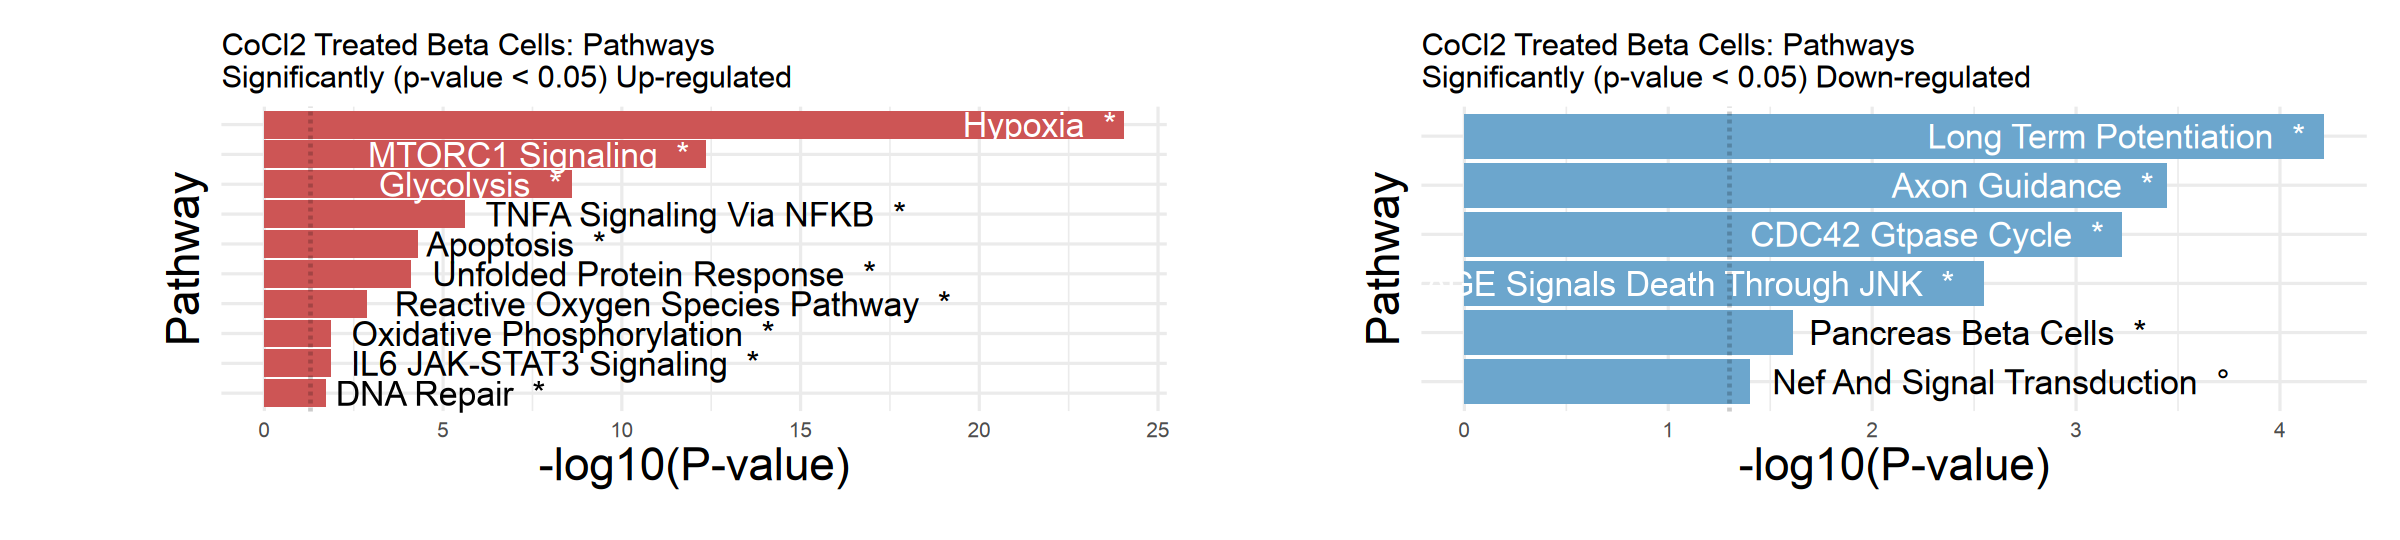

In [243]:
options(repr.plot.width=20, repr.plot.height=4.5)
labelSize = 7
themeSize = 15
hjustLabelFlipLeft = -0.05
hjustLabelFlipRight = 1.05
axisSize = 27



# pathwayType
# Create horizontal barplot

upFlipLeft <- c("HALLMARK_HYPOXIA", "HALLMARK_MTORC1_SIGNALING", "HALLMARK_GLYCOLYSIS", "REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS")
downFlipLeft <- c('REACTOME_CDC42_GTPASE_CYCLE', 'KEGG_AXON_GUIDANCE', 'REACTOME_NRAGE_SIGNALS_DEATH_THROUGH_JNK', 'REACTOME_LONG_TERM_POTENTIATION' )

pUp <- ggplot(beta_old_up_order_plot, aes(x = LOG10P, y = reorder(label, LOG10P))) +
    geom_bar(stat = "identity", fill = "indianred3") +
  geom_text(aes(label = label2),  size = labelSize, color= ifelse(!beta_old_up_order_plot$pathway %in% upFlipLeft, "black" ,"white" ),
            position = position_dodge(width = 0.9), 
            hjust = ifelse(!beta_old_up_order_plot$pathway %in% upFlipLeft, hjustLabelFlipLeft ,hjustLabelFlipRight )
           ) +
    labs(title = 'CoCl2 Treated Beta Cells: Pathways \nSignificantly (p-value < 0.05) Up-regulated' , x = "-log10(P-value)", y = "Pathway") +
    theme_minimal(base_size  = themeSize ) + 
    geom_vline(xintercept = -log10(.05), linetype = "dashed", color = "black", alpha = .2, linewidth = 1) + 
theme(axis.text.y = element_blank(), plot.margin = margin(t = 20, r = 20, b = 30, l = 100),
                 axis.title.x = element_text(size = axisSize),
                axis.title.y = element_text(size = axisSize)  )  
# pUp




pDown <- ggplot(beta_old_down_order_plot, aes(x = LOG10P, y = reorder(label, LOG10P))) +
    geom_bar(stat = "identity", fill = "skyblue3") +

  geom_text(aes(label = label2),  size = labelSize, color= ifelse(!beta_old_down_order_plot$pathway %in% downFlipLeft, "black" ,"white" ), 
            position = position_dodge(width = 0.9), 
            hjust = ifelse(!beta_old_down_order_plot$pathway %in% downFlipLeft, hjustLabelFlipLeft ,hjustLabelFlipRight  )
           ) +
    labs(title = 'CoCl2 Treated Beta Cells: Pathways \nSignificantly (p-value < 0.05) Down-regulated' , x = "-log10(P-value)", y = "Pathway") +
    theme_minimal(base_size  = themeSize) + 
    geom_vline(xintercept = -log10(.05), linetype = "dashed", color = "black", alpha = .2, linewidth = 1) + 
theme(axis.text.y = element_blank(), plot.margin = margin(t = 20, r = 20, b = 30, l = 100),
                 axis.title.x = element_text(size = axisSize),
                axis.title.y = element_text(size = axisSize)  )  
# pDown


combined_plot24_smaller <- ggarrange(pUp, pDown, ncol = 2, nrow = 1)
combined_plot24_smaller

In [244]:
ggsave(
  filename = paste(scOutDir, 'scBeta.fGSEA.CherryPickedPathways.plot.fixedSig.27x9.pdf'),
  plot = combined_plot24_smaller,
    width = 27,
    height =  9,
    unit = 'in',
  device = 'pdf',
  dpi = 900
)

In [26]:
head(beta_old_up_order_plot )

pathway,pval,padj,log2err,ES,NES,size,label,LOG10P,PathwayTotalSize
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<int>
HALLMARK_HYPOXIA,7.181517e-25,8.839011e-21,1.2951231,0.7865449,2.473321,166,Hypoxia (Hallmark Gene Set),24.143784,200
HALLMARK_MTORC1_SIGNALING,2.458865e-14,1.513186e-10,0.9759947,0.6868421,2.182636,187,Mtorc1 Signaling (Hallmark Gene Set),13.609265,200
HALLMARK_GLYCOLYSIS,3.702338e-10,3.797365e-07,0.8140358,0.6493413,2.054427,174,Glycolysis (Hallmark Gene Set),9.431524,200
HALLMARK_OXIDATIVE_PHOSPHORYLATION,1.370838e-08,7.669217e-06,0.7477397,0.6052772,1.926875,189,Oxidative Phosphorylation (Hallmark Gene Set),7.863014,200
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,1.217904e-06,2.939207e-04,0.6435518,0.6495857,1.945478,105,Unfolded Protein Response (Hallmark Gene Set),5.914387,113
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,5.692929e-06,9.868812e-04,0.6105269,0.7476104,2.017228,46,Reactive Oxygen Species Pathway (Hallmark Gene Set),5.244664,49


In [245]:


  scOutDir = '/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/figures/'

outfilename3 = paste0(scOutDir,  'scBeta.GSEA.UP.tableForBarPlot..txt')
write.table(beta_old_up_order_plot, file = outfilename3, quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE)
  
outfilename4 = paste0(scOutDir,  'scBeta.GSEA.DOWN.tableForBarPlot..txt')
write.table(beta_old_down_order_plot, file = outfilename4, quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE)
  
outfilename5 = paste0(scOutDir,  'scBeta.GSEA.allBetaPathways.tableForBarPlot.txt')
write.table(beta_old, file = outfilename5, quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE)
  


In [322]:
scOutDir

[1] "/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/figures/"

In [14]:
ductal  = annoResList[['ductal']]
ductal$leadingEdge = NULL

ductal_up <- ductal[which(ductal$NES > 0),]
ductal_down <- ductal[which(ductal$NES < 0),]
ductal_up_order <-  ductal_up %>%
    arrange(desc(LOG10P))
    
    ductal_down_order <-  ductal_down %>%
    arrange(desc(LOG10P))

rownames(ductal_up_order) <- ductal_up_order$pathway
rownames(ductal_down_order) <- ductal_down_order$pathway


In [15]:
acinar  = annoResList[['acinar']]
acinar$leadingEdge = NULL

acinar_up <- acinar[which(acinar$NES > 0),]
acinar_down <- acinar[which(acinar$NES < 0),]
acinar_up_order <-  acinar_up %>%
    arrange(desc(LOG10P))
    
    acinar_down_order <-  acinar_down %>%
    arrange(desc(LOG10P))

rownames(acinar_up_order) <- acinar_up_order$pathway
rownames(acinar_down_order) <- acinar_down_order$pathway


In [17]:

alpha  = annoResList[['alpha']]
alpha$leadingEdge = NULL

alpha_up <- alpha[which(alpha$NES > 0),]
alpha_down <- alpha[which(alpha$NES < 0),]
alpha_up_order <-  alpha_up %>%
    arrange(desc(LOG10P))
    
    alpha_down_order <-  alpha_down %>%
    arrange(desc(LOG10P))

rownames(alpha_up_order) <- alpha_up_order$pathway
rownames(alpha_down_order) <- alpha_down_order$pathway

# head(alpha_up_order, 20)
# head(alpha_down_order, 20)


gamma  = annoResList[['gamma']]
gamma$leadingEdge = NULL

gamma_up <- gamma[which(gamma$NES > 0),]
gamma_down <- gamma[which(gamma$NES < 0),]
gamma_up_order <-  gamma_up %>%
    arrange(desc(LOG10P))
    
    gamma_down_order <-  gamma_down %>%
    arrange(desc(LOG10P))

rownames(gamma_up_order) <- gamma_up_order$pathway
rownames(gamma_down_order) <- gamma_down_order$pathway

# head(gamma_up_order, 20)
# head(gamma_down_order, 20)

stellate  = annoResList[['stellate']]
stellate$leadingEdge = NULL

stellate_up <- stellate[which(stellate$NES > 0),]
stellate_down <- stellate[which(stellate$NES < 0),]
stellate_up_order <-  stellate_up %>%
    arrange(desc(LOG10P))
    
    stellate_down_order <-  stellate_down %>%
    arrange(desc(LOG10P))

rownames(stellate_up_order) <- stellate_up_order$pathway
rownames(stellate_down_order) <- stellate_down_order$pathway

# head(stellate_up_order, 20)
# head(stellate_down_order, 20)


In [18]:
allSigPathways = list()


for (cell in celltypes2){
    res = annoResList[[cell]]
    res$leadingEdge = NULL
    res <- res %>% filter(pval < 0.05)
    paths = rownames(res)
    allSigPathways = append(allSigPathways, paths)
}
allSigPathways = unique(unlist(allSigPathways))
length(allSigPathways)

[1] 604

In [24]:
summary_sig_df <- as.data.frame(matrix(0, nrow = length(celltypes2), ncol = length(allSigPathways)))
summary_NES_df <- as.data.frame(matrix(0, nrow = length(celltypes2), ncol = length(allSigPathways)))
summary_ES_df <- as.data.frame(matrix(0, nrow = length(celltypes2), ncol = length(allSigPathways)))
summary_padj_df <- as.data.frame(matrix(0, nrow = length(celltypes2), ncol = length(allSigPathways)))

# colnames(summary_sig_df) <- allSigPathways
colnames(summary_sig_df) <- allSigPathways
colnames(summary_NES_df) <- allSigPathways
colnames(summary_ES_df) <- allSigPathways
colnames(summary_padj_df) <- allSigPathways
rownames(summary_sig_df) <- celltypes2
rownames(summary_padj_df) <- celltypes2
rownames(summary_NES_df) <- celltypes2
rownames(summary_ES_df) <- celltypes2
rownames(summary_ES_df) <- celltypes2
rownames(summary_padj_df) <- celltypes2
for (cell in celltypes2){
    res = as.data.frame(annoResList[[cell]])
    res$leadingEdge = NULL
    rownames(res) = res$pathway
    for (path in allSigPathways){
        summary_sig_df[cell, path] = res[path, 'pval']
        summary_padj_df[cell, path] = res[path, 'padj']
        summary_NES_df[cell, path] = res[path, 'NES']
        summary_ES_df[cell, path] = res[path, 'ES']
        
    }

}
summary_sig_df[is.na(summary_sig_df)] <- 1
summary_NES_df[is.na(summary_NES_df)] <- 0
summary_ES_df[is.na(summary_ES_df)] <- 0
summary_padj_df[is.na(summary_padj_df)] <- 1
# head(summary_sig_df)
# head(summary_NES_df)

In [58]:
min(summary_padj_df)

[1] 4.53042e-23

In [25]:
summary_pval_df <- summary_sig_df

In [67]:
summary_padj_df[,'HALLMARK_HYPOXIA']

[1] 6.069353e-01 3.841788e-11 4.530420e-23 2.791227e-03 4.562052e-02
[6] 1.794034e-01 7.274722e-01

In [32]:
# plot_paths = c('HALLMARK_APOPTOSIS', 'HALLMARK_HYPOXIA', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'HALLMARK_GLYCOLYSIS', 'REACTOME_TRANSPORT_OF_SMALL_MOLECULES', 'REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL', 'KEGG_TYPE_I_DIABETES_MELLITUS',  
# 'REACTOME_MITOPHAGY', 'REACTOME_HSF1_ACTIVATION', 'REACTOME_NUCLEAR_EVENTS_MEDIATED_BY_NFE2L2', 'REACTOME_MYOGENESIS')




In [34]:
# allSigPathways

In [284]:
# summary_NES_df_means = colMeans(summary_NES_df)
# summary_NES_df_means = as.data.frame(summary_NES_df_means)
# summary_NES_df_means <- summary_NES_df_means  %>%
#     arrange(desc(summary_NES_df_means))
# summary_NES_df_means

In [61]:
head((annoResList[['beta']]['HALLMARK_HYPOXIA',]))

,pathway,pval,padj,log2err,ES,NES,size,LOG10P,label,PathwayTotalSize,Celltype
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<chr>
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,9.06084e-25,4.53042e-23,1.287104,0.7742821,3.744764,62,24.04283,Hypoxia (Hallmark Gene Set),200,beta


In [68]:

plot_paths = c('HALLMARK_HYPOXIA', 'HALLMARK_APOPTOSIS', 'HALLMARK_GLYCOLYSIS', 
               'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY', 
               'REACTOME_SIGNALING_BY_INTERLEUKINS', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB',
                'REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'KEGG_TYPE_I_DIABETES_MELLITUS',  
                'REACTOME_HSF1_ACTIVATION', 'HALLMARK_PANCREAS_BETA_CELLS', 'REACTOME_DNA_METHYLATION', 
              'HALLMARK_UV_RESPONSE_DN', 'REACTOME_NONHOMOLOGOUS_END_JOINING_NHEJ', 
               'KEGG_FOCAL_ADHESION', 'REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS', 
               'REACTOME_DISORDERS_OF_TRANSMEMBRANE_TRANSPORTERS', 'REACTOME_AUTOPHAGY', 
               'REACTOME_TCF_DEPENDENT_SIGNALING_IN_RESPONSE_TO_WNT', 'REACTOME_DNA_REPLICATION', 
               'REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS', 'REACTOME_RHOQ_GTPASE_CYCLE', 'REACTOME_CIRCADIAN_CLOCK')
        


df_long_NES <-  as.data.frame(summary_NES_df %>%
  rownames_to_column(var = "CellType") %>%
  pivot_longer(cols = -CellType, names_to = "Pathway", values_to = "NES"))
# df_long
df_long_NES$Pathway_Celltype = paste0(df_long_NES$Pathway, '__', df_long_NES$CellType)
rownames(df_long_NES) = df_long_NES$Pathway_Celltype

df_long_pval <-  as.data.frame(summary_pval_df %>%
  rownames_to_column(var = "CellType") %>%
  pivot_longer(cols = -CellType, names_to = "Pathway", values_to = "pval"))
# df_long
df_long_pval$Pathway_Celltype = paste0(df_long_pval$Pathway, '__', df_long_pval$CellType)
rownames(df_long_pval) = df_long_pval$Pathway_Celltype

df_long_ES <- as.data.frame(summary_ES_df %>%
  rownames_to_column(var = "CellType") %>%
  pivot_longer(cols = -CellType, names_to = "Pathway", values_to = "ES"))
# df_long
df_long_ES$Pathway_Celltype = paste0(df_long_ES$Pathway, '__', df_long_ES$CellType)
rownames(df_long_ES) = df_long_ES$Pathway_Celltype

df_long_padj <- as.data.frame(summary_padj_df %>%
  rownames_to_column(var = "CellType") %>%
  pivot_longer(cols = -CellType, names_to = "Pathway", values_to = "padj"))
# df_long
df_long_padj$Pathway_Celltype = paste0(df_long_padj$Pathway, '__', df_long_padj$CellType)
rownames(df_long_padj) = df_long_padj$Pathway_Celltype





In [69]:
df_summary = df_long_NES
df_long_pval = df_long_pval[rownames(df_summary),]
df_long_ES = df_long_ES[rownames(df_summary),]
df_long_padj = df_long_padj[rownames(df_summary),]


In [70]:
df_summary$pval = df_long_pval$pval
df_summary$ES = df_long_ES$ES
df_summary$padj = df_long_padj$padj
df_summary$sig <- ifelse(df_summary$padj < 0.1, '*', ifelse(df_summary$pval<0.05,'\u00b0',''))

In [71]:
head(df_summary)

,CellType,Pathway,NES,Pathway_Celltype,pval,ES,padj,sig
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
KEGG_ALZHEIMERS_DISEASE__acinar,acinar,KEGG_ALZHEIMERS_DISEASE,1.657933,KEGG_ALZHEIMERS_DISEASE__acinar,0.0006554357,0.9837398,0.06947618,*
KEGG_CARDIAC_MUSCLE_CONTRACTION__acinar,acinar,KEGG_CARDIAC_MUSCLE_CONTRACTION,1.643226,KEGG_CARDIAC_MUSCLE_CONTRACTION__acinar,0.0115102952,0.8448980,0.30502282,<U+00B0>
KEGG_CHEMOKINE_SIGNALING_PATHWAY__acinar,acinar,KEGG_CHEMOKINE_SIGNALING_PATHWAY,1.438702,KEGG_CHEMOKINE_SIGNALING_PATHWAY__acinar,0.0473685143,0.8536585,0.39252561,<U+00B0>
KEGG_ECM_RECEPTOR_INTERACTION__acinar,acinar,KEGG_ECM_RECEPTOR_INTERACTION,-1.859420,KEGG_ECM_RECEPTOR_INTERACTION__acinar,0.0053051751,-0.8775510,0.28117428,<U+00B0>
KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_SULFATE__acinar,acinar,KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_SULFATE,-1.304129,KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_SULFATE__acinar,0.0493708616,-0.9797571,0.39252561,<U+00B0>
KEGG_LONG_TERM_POTENTIATION__acinar,acinar,KEGG_LONG_TERM_POTENTIATION,1.303649,KEGG_LONG_TERM_POTENTIATION__acinar,0.0490872373,0.9797571,0.39252561,<U+00B0>


In [160]:
out_dir

[1] "/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/GSEA/redo_sc/"

In [72]:
outfilename4 = paste0(out_dir,  'mult_celltypes.KEGG_HALLMARK_REACTOME.finalSummaryTable_NES_ES_pval_padj.txt')
write.table(df_summary, file = outfilename4, quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE)
  

In [73]:
df_summary_sub = df_summary %>% filter(Pathway %in% plot_paths)


In [89]:
unique(df_summary_sub$Pathway)

[1] "REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS"     
 [2] "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"        
 [3] "KEGG_TYPE_I_DIABETES_MELLITUS"                   
 [4] "REACTOME_AUTOPHAGY"                              
 [5] "REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS"   
 [6] "HALLMARK_APOPTOSIS"                              
 [7] "HALLMARK_GLYCOLYSIS"                             
 [8] "HALLMARK_HYPOXIA"                                
 [9] "HALLMARK_OXIDATIVE_PHOSPHORYLATION"              
[10] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"                
[11] "HALLMARK_UNFOLDED_PROTEIN_RESPONSE"              
[12] "REACTOME_DNA_REPLICATION"                        
[13] "REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL"
[14] "REACTOME_SIGNALING_BY_INTERLEUKINS"              
[15] "HALLMARK_IL6_JAK_STAT3_SIGNALING"                
[16] "HALLMARK_PANCREAS_BETA_CELLS"                    
[17] "REACTOME_DISORDERS_OF_TRANSMEMBRANE_TRANSPORTERS"
[18] "HALLMARK_UV_RESPONSE_DN"

In [135]:

df_summary_sub$label = ''

df_summary_sub <- df_summary_sub %>% 
                  mutate(label = case_when(
                    Pathway == 'REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS' ~ 'Integrin Cell \nSurface Interactions',
                    Pathway == 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY' ~ 'ROS Pathway',
                    Pathway == 'KEGG_TYPE_I_DIABETES_MELLITUS' ~ 'Type I Diabetes \nMellitus',
                    Pathway == 'REACTOME_AUTOPHAGY' ~ 'Autophagy',
                    Pathway == 'REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS' ~ 'Cellular Response \nto Chemical Stress',
                    Pathway == 'HALLMARK_APOPTOSIS' ~ 'Apoptosis',
                    Pathway == 'HALLMARK_GLYCOLYSIS' ~ 'Glycolysis',
                    Pathway == 'HALLMARK_HYPOXIA' ~ 'Hypoxia',
                    Pathway == 'HALLMARK_OXIDATIVE_PHOSPHORYLATION' ~ 'Oxidative \nPhosphorylation',
                    Pathway == 'HALLMARK_TNFA_SIGNALING_VIA_NFKB' ~ 'TNFA Signaling \nvia NFKB',
                    Pathway == 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE' ~ 'Unfolded Protein \nResponse',
                    Pathway == 'REACTOME_DNA_REPLICATION' ~ 'DNA Replication',
                    Pathway == 'REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL' ~ 'NFKB is Activated \nand Signals Survival',
                    Pathway == 'REACTOME_SIGNALING_BY_INTERLEUKINS' ~ 'Signaling by \nInterleukins',
                            Pathway == 'HALLMARK_IL6_JAK_STAT3_SIGNALING' ~ 'IL6 \nJAK-STAT3 \nSignaling',
                    Pathway == 'HALLMARK_PANCREAS_BETA_CELLS' ~ 'Pancreas Beta Cells',
                                Pathway == 'REACTOME_DISORDERS_OF_TRANSMEMBRANE_TRANSPORTERS' ~ 'Disorders of \nTransmembrane Transporters',
                                        Pathway == 'HALLMARK_UV_RESPONSE_DN' ~ 'UV Response Dn',
                    TRUE ~ ''
                  ))



In [153]:
df_summary_sub2_noGamma = df_summary_sub %>% filter(CellType != 'gamma')


In [154]:
# df_summary_hallmark = df_summary %>% filter(Pathway == 'HALLMARK_HYPOXIA')
# df_summary_hallmark

In [155]:
# df_summary_sub_A = df_summary_sub[,c('HALLMARK_HYPOXIA', 'HALLMARK_APOPTOSIS', 'HALLMARK_GLYCOLYSIS', 
#                'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY')]
# df_summary_sub_B = df_summary_sub[,c('REACTOME_SIGNALING_BY_INTERLEUKINS', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB',
#                 'REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'KEGG_TYPE_I_DIABETES_MELLITUS',  
#                 'REACTOME_HSF1_ACTIVATION')]

# df_summary_sub_C = df_summary_sub[,c( 'HALLMARK_PANCREAS_BETA_CELLS', 'REACTOME_DNA_METHYLATION', 
#               'HALLMARK_UV_RESPONSE_DN', 'REACTOME_NONHOMOLOGOUS_END_JOINING_NHEJ', 
#                'KEGG_FOCAL_ADHESION', 'REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS')]
# df_summary_sub_D = df_summary_sub[,c( 'REACTOME_DISORDERS_OF_TRANSMEMBRANE_TRANSPORTERS', 'REACTOME_AUTOPHAGY', 
#                'REACTOME_TCF_DEPENDENT_SIGNALING_IN_RESPONSE_TO_WNT', 'REACTOME_DNA_REPLICATION', 
#                'REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS', 'REACTOME_RHOQ_GTPASE_CYCLE', 'REACTOME_CIRCADIAN_CLOCK')]
         
df_summary_sub_A = df_summary_sub %>% filter(Pathway %in% c('HALLMARK_HYPOXIA', 'HALLMARK_APOPTOSIS', 'HALLMARK_GLYCOLYSIS', 
               'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY'))

df_summary_sub_B = df_summary_sub %>% filter(Pathway %in% c('REACTOME_SIGNALING_BY_INTERLEUKINS', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB',
                'REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'KEGG_TYPE_I_DIABETES_MELLITUS',  
                'REACTOME_HSF1_ACTIVATION'))

df_summary_sub_A_noGamma = df_summary_sub2_noGamma %>% filter(Pathway %in% c('HALLMARK_HYPOXIA', 'HALLMARK_APOPTOSIS', 'HALLMARK_GLYCOLYSIS', 
               'HALLMARK_UNFOLDED_PROTEIN_RESPONSE', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY'))

df_summary_sub_B_noGamma = df_summary_sub2_noGamma %>% filter(Pathway %in% c('REACTOME_SIGNALING_BY_INTERLEUKINS', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB',
                'REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'KEGG_TYPE_I_DIABETES_MELLITUS',  
                'REACTOME_HSF1_ACTIVATION'))




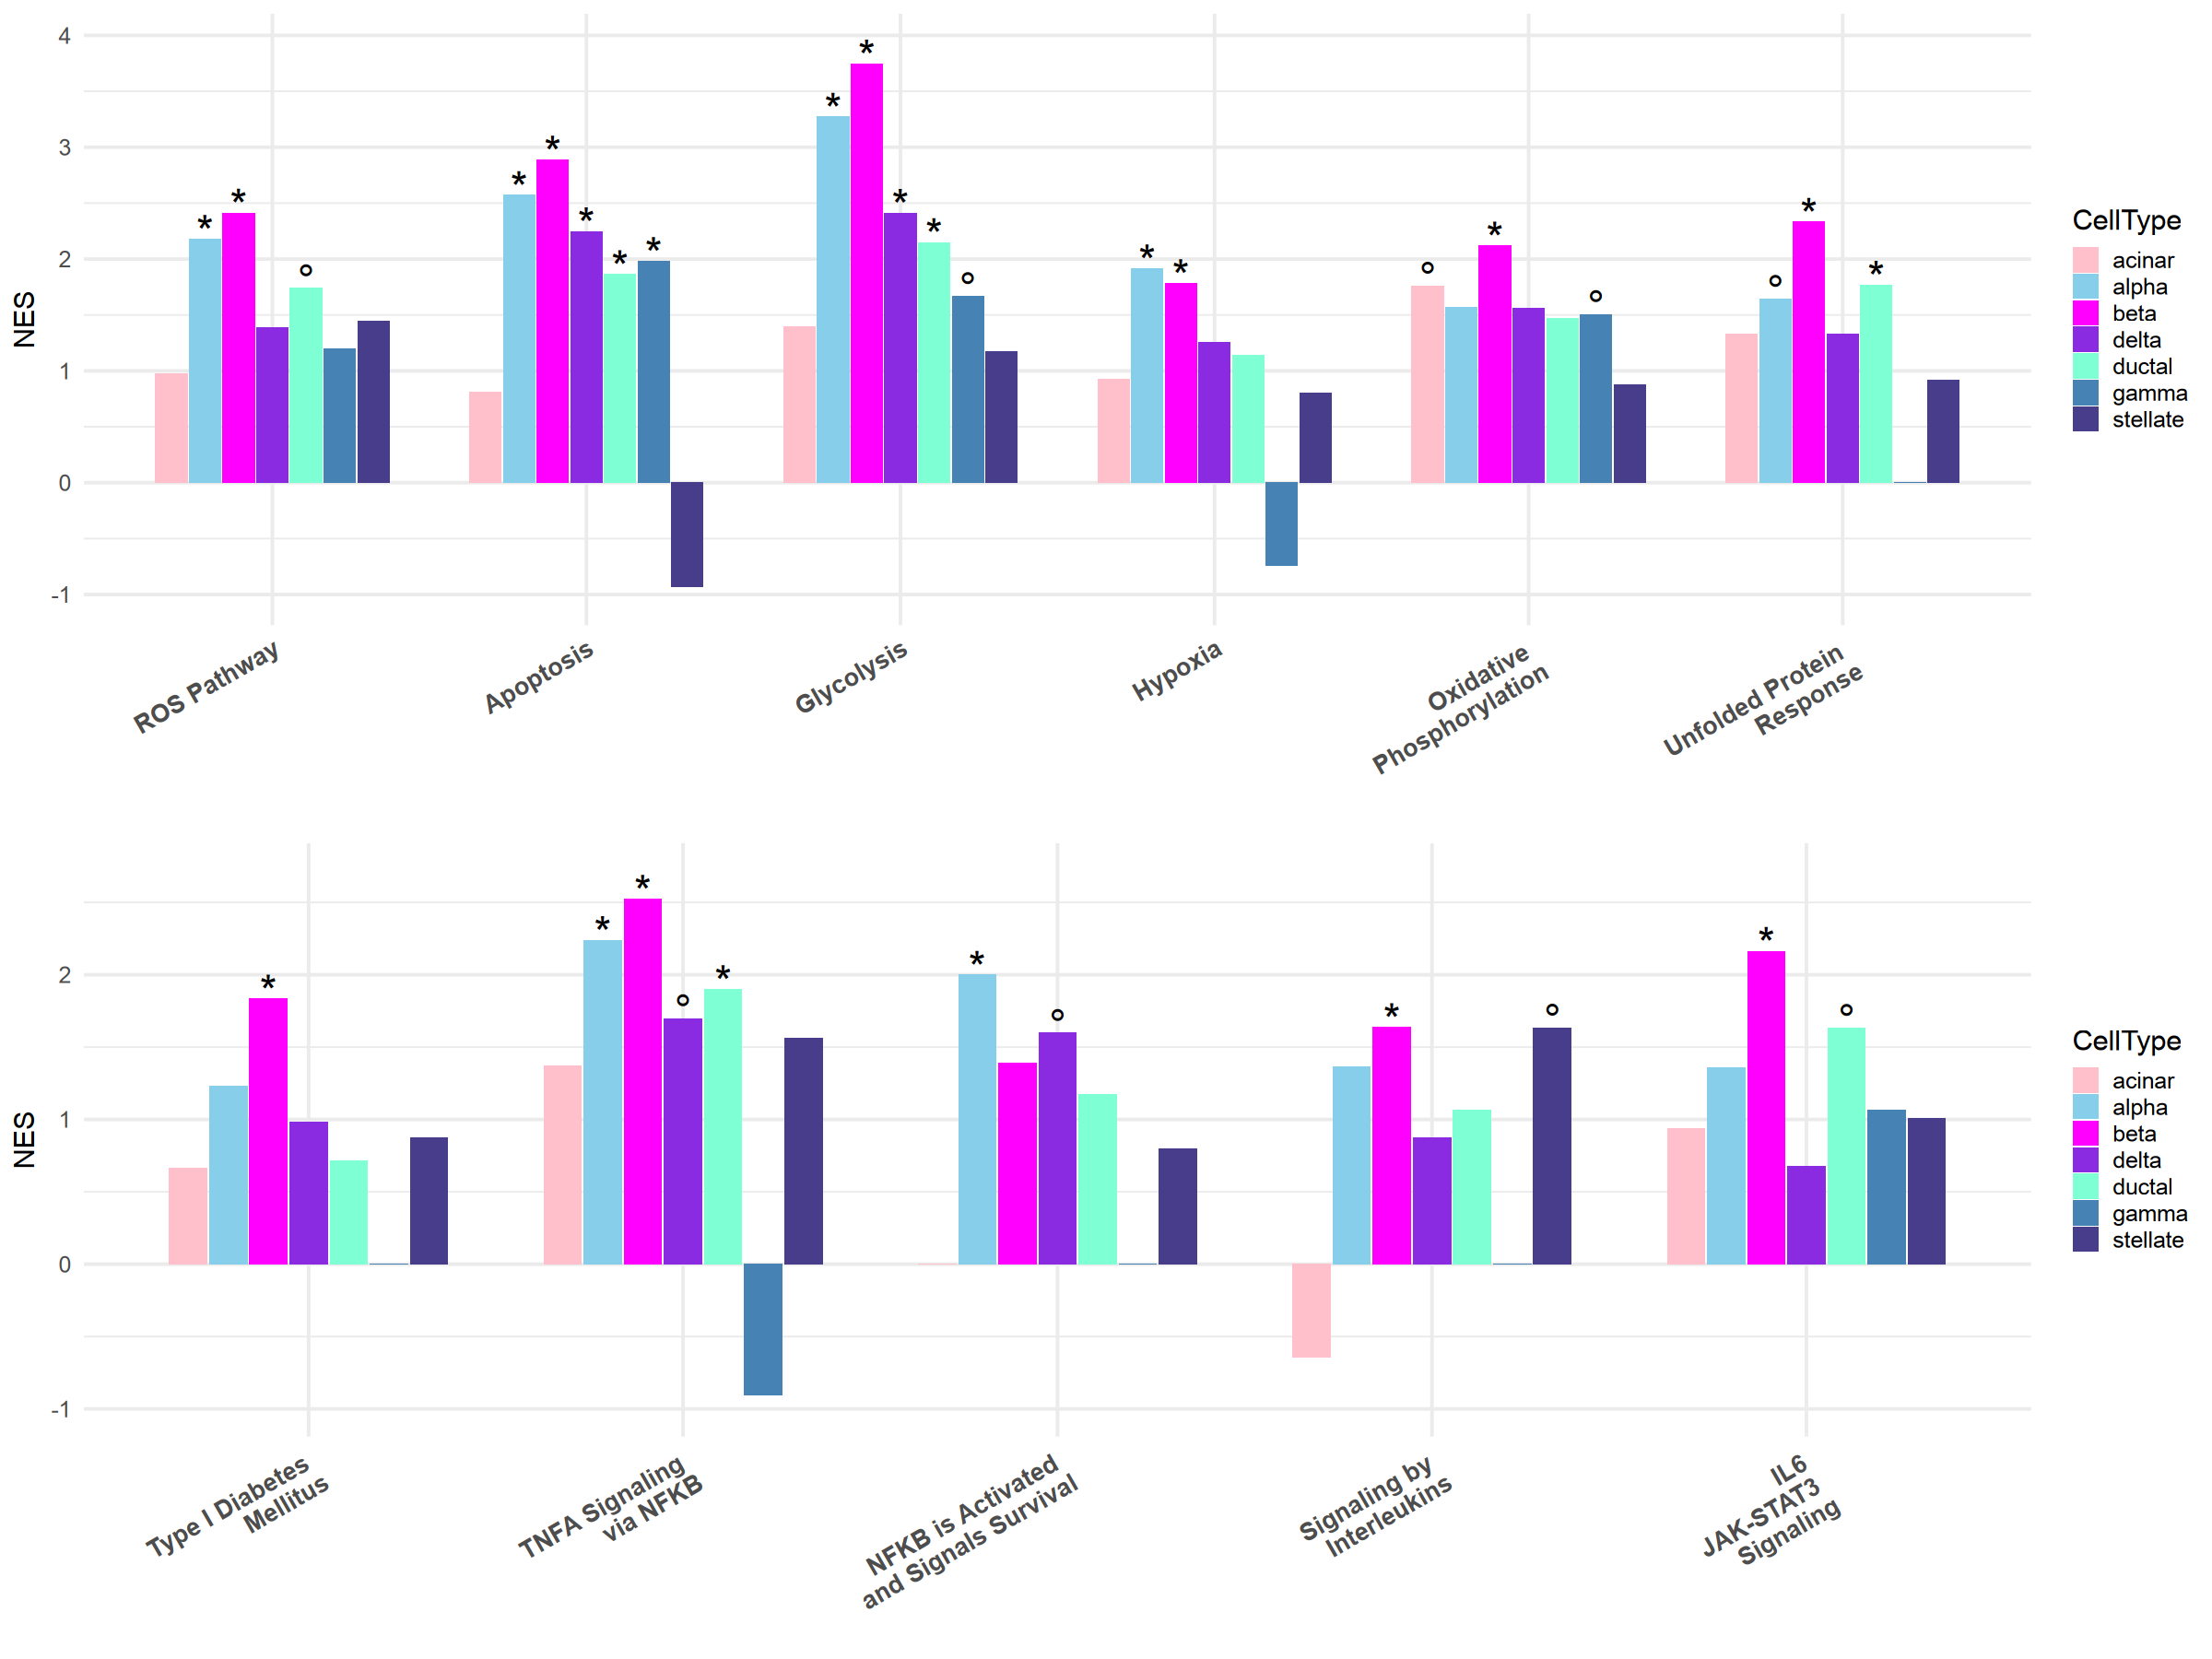

In [149]:
options(repr.plot.width=25, repr.plot.height=15)

base_size1 = 18
width1_barWidth <- 0.7  # Width of the bars
position_dodge_width = .75 # Spacing between bars within a group
labelSize = 19
position_dodge1 = 0.5 
celltype_colors = c('acinar' = 'pink',
                    'alpha' = '#87CEEB',  # SkyBlue
                    'beta' = 'magenta', 
                    'delta' = '#8A2BE2', # BlueViolet
                    'ductal' = '#7FFFD4', # Aquamarine
                    'gamma' = '#4682B4', # SteelBlue
                    'stellate' = 'darkslateblue' )


# Example values for width parameters

yMaxA  = max(df_summary_sub_A$NES) + .2
yMinA = min(df_summary_sub_A$NES) - .1
pA <- ggplot(df_summary_sub_A, aes(x = Pathway, y = NES, fill = CellType)) +
  geom_bar(stat = "identity", position = position_dodge(width = position_dodge_width, preserve = "single"), width = width1_barWidth) +
                      labs(
                           x = "",
                           y = "NES") + 
       geom_text(aes(Pathway, NES, label=sig), size=10, position=position_dodge(position_dodge_width), vjust=0.25) + 
        theme_minimal(base_size = base_size1) +   
        ylim(yMinA, yMaxA) + 
         scale_x_discrete( labels = df_summary_sub_A$label ) + 
       theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1, size = 16, face = 'bold'),  axis.title.x = element_text(vjust = .5)) +

  scale_fill_manual(values = celltype_colors)

# print(pA)

yMaxB  = max(df_summary_sub_B$NES) + .2
yMinB = min(df_summary_sub_B$NES) - .1
pB <- ggplot(df_summary_sub_B, aes(x = Pathway, y = NES, fill = CellType)) +
  geom_bar(stat = "identity", position = position_dodge(width = position_dodge_width, preserve = "single"), width = width1_barWidth) +
  labs(
       x = "",
       y = "NES") +
        ylim(yMinB, yMaxB) + 
           geom_text(aes(Pathway, NES, label=sig), size=10, position=position_dodge(position_dodge_width), vjust=0.25) + 
         scale_x_discrete( labels = df_summary_sub_B$label  ) + 
  theme_minimal(base_size = base_size1) +   
theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1, size = 16, face = 'bold'),  axis.title.x = element_text(vjust = .5)) +

  scale_fill_manual(values = celltype_colors)


# pC <- ggplot(df_long_NES_C, aes(x = Pathway, y = NES, fill = CellType)) +
#   geom_bar(stat = "identity", position = position_dodge(width = .5, preserve = "single"), width = 0.5) +
#   labs(
#        x = "",
#        y = "NES") +
#   theme_minimal(base_size = 20) +   theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1, size = 16),  axis.title.x = element_text(vjust = .5)) +

#   scale_fill_manual(values = celltype_colors)

# pD <- ggplot(df_long_NES_D, aes(x = Pathway, y = NES, fill = CellType)) +
#   geom_bar(stat = "identity", position = position_dodge(width = .5, preserve = "single"), width = 0.5) +
#   labs(
#        x = "",
#        y = "NES") +
#   theme_minimal(base_size = 20) +   theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1, size = 16),  axis.title.x = element_text(vjust = .5)) +

#   scale_fill_manual(values = celltype_colors)

options(repr.plot.width=20, repr.plot.height=15)
combined_plot_pathcompare  <- ggarrange(pA, pB, ncol = 1, nrow = 2)
combined_plot_pathcompare


In [150]:
ggsave(
  filename = paste(scOutDir, 'sc.fGSEA.PathwayComparison.NES.fixedSig.plot.pdf'),
  plot = combined_plot_pathcompare,
    width = 25,
    height = 15,
    unit = 'in',
  device = 'pdf',
  dpi = 900
)

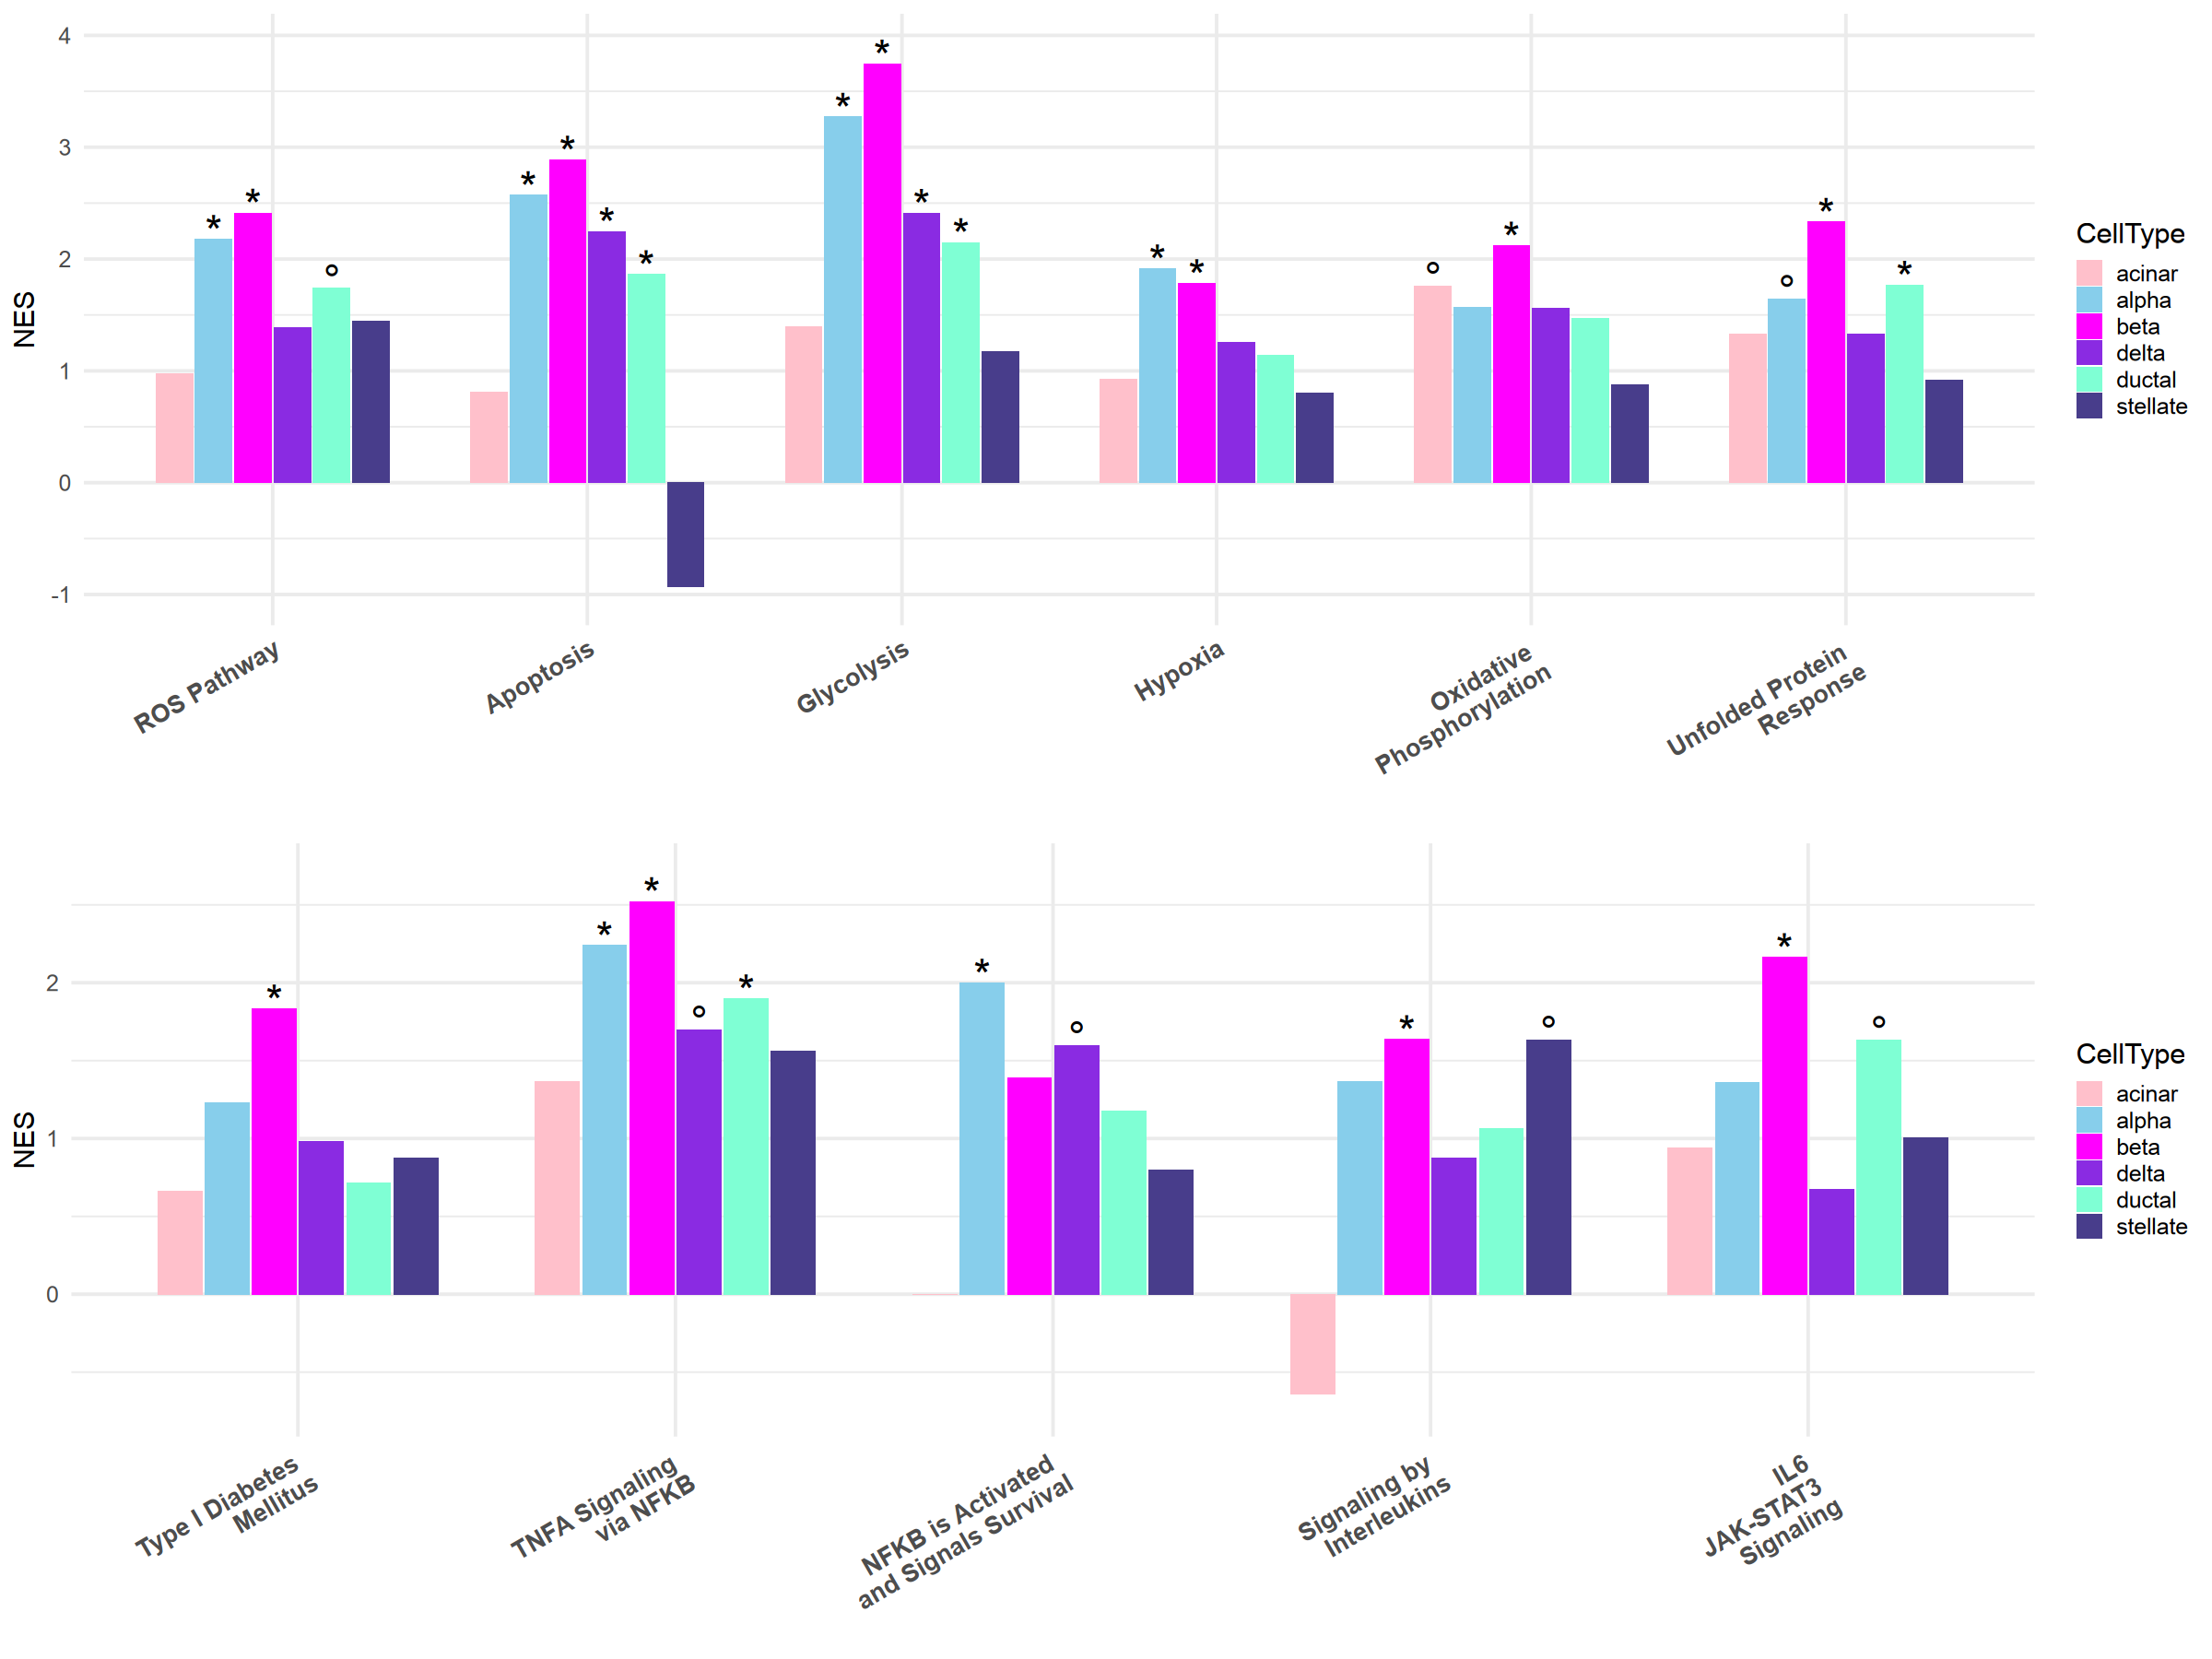

In [156]:
options(repr.plot.width=25, repr.plot.height=15)

base_size1 = 18
width1_barWidth <- 0.7  # Width of the bars
position_dodge_width = .75 # Spacing between bars within a group
labelSize = 19
position_dodge1 = 0.5 
celltype_colors = c('acinar' = 'pink',
                    'alpha' = '#87CEEB',  # SkyBlue
                    'beta' = 'magenta', 
                    'delta' = '#8A2BE2', # BlueViolet
                    'ductal' = '#7FFFD4', # Aquamarine
                    'gamma' = '#4682B4', # SteelBlue
                    'stellate' = 'darkslateblue' )


# Example values for width parameters

yMaxA  = max(df_summary_sub_A_noGamma$NES) + .2
yMinA = min(df_summary_sub_A_noGamma$NES) - .1
pA <- ggplot(df_summary_sub_A_noGamma, aes(x = Pathway, y = NES, fill = CellType)) +
  geom_bar(stat = "identity", position = position_dodge(width = position_dodge_width, preserve = "single"), width = width1_barWidth) +
                      labs(
                           x = "",
                           y = "NES") + 
       geom_text(aes(Pathway, NES, label=sig), size=10, position=position_dodge(position_dodge_width), vjust=0.25) + 
        theme_minimal(base_size = base_size1) +   
        ylim(yMinA, yMaxA) + 
         scale_x_discrete( labels = df_summary_sub_A_noGamma$label ) + 
       theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1, size = 16, face = 'bold'),  axis.title.x = element_text(vjust = .5)) +

  scale_fill_manual(values = celltype_colors)

# print(pA)

yMaxB  = max(df_summary_sub_B_noGamma$NES) + .2
yMinB = min(df_summary_sub_B_noGamma$NES) - .1
pB <- ggplot(df_summary_sub_B_noGamma, aes(x = Pathway, y = NES, fill = CellType)) +
  geom_bar(stat = "identity", position = position_dodge(width = position_dodge_width, preserve = "single"), width = width1_barWidth) +
  labs(
       x = "",
       y = "NES") +
        ylim(yMinB, yMaxB) + 
           geom_text(aes(Pathway, NES, label=sig), size=10, position=position_dodge(position_dodge_width), vjust=0.25) + 
         scale_x_discrete( labels = df_summary_sub_B_noGamma$label  ) + 
  theme_minimal(base_size = base_size1) +   
theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1, size = 16, face = 'bold'),  axis.title.x = element_text(vjust = .5)) +

  scale_fill_manual(values = celltype_colors)


# pC <- ggplot(df_long_NES_C, aes(x = Pathway, y = NES, fill = CellType)) +
#   geom_bar(stat = "identity", position = position_dodge(width = .5, preserve = "single"), width = 0.5) +
#   labs(
#        x = "",
#        y = "NES") +
#   theme_minimal(base_size = 20) +   theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1, size = 16),  axis.title.x = element_text(vjust = .5)) +

#   scale_fill_manual(values = celltype_colors)

# pD <- ggplot(df_long_NES_D, aes(x = Pathway, y = NES, fill = CellType)) +
#   geom_bar(stat = "identity", position = position_dodge(width = .5, preserve = "single"), width = 0.5) +
#   labs(
#        x = "",
#        y = "NES") +
#   theme_minimal(base_size = 20) +   theme(axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1, size = 16),  axis.title.x = element_text(vjust = .5)) +

#   scale_fill_manual(values = celltype_colors)

options(repr.plot.width=20, repr.plot.height=15)
combined_plot_pathcompare2  <- ggarrange(pA, pB, ncol = 1, nrow = 2)
combined_plot_pathcompare2

In [157]:
ggsave(
  filename = paste(scOutDir, 'sc.fGSEA.PathwayComparison.NES.fixedSig.NoGamma.plot.pdf'),
  plot = combined_plot_pathcompare2,
    width = 25,
    height = 15,
    unit = 'in',
  device = 'pdf',
  dpi = 900
)

In [158]:

outfilename4 = paste0(out_dir,  'sc.fGSEA.PathwayComparison.NES.fixedSig.Table.txt')
write.table(df_summary_sub, file = outfilename4, quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE)
  

In [246]:
df_summary_sub

,CellType,Pathway,NES,Pathway_Celltype,pval,ES,padj,sig,label
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS__acinar,acinar,REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS,-1.8605462,REACTOME_INTEGRIN_CELL_SURFACE_INTERACTIONS__acinar,5.722461e-03,-0.8775510,4.452074e-01,<U+00B0>,Integrin Cell Surface Interactions
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY__acinar,acinar,HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,1.7598788,HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY__acinar,9.575426e-03,0.7107438,2.106594e-01,<U+00B0>,ROS Pathway
KEGG_TYPE_I_DIABETES_MELLITUS__acinar,acinar,KEGG_TYPE_I_DIABETES_MELLITUS,0.0000000,KEGG_TYPE_I_DIABETES_MELLITUS__acinar,1.000000e+00,0.0000000,1.000000e+00,,Type I Diabetes Mellitus
REACTOME_AUTOPHAGY__acinar,acinar,REACTOME_AUTOPHAGY,0.9281761,REACTOME_AUTOPHAGY__acinar,5.624190e-01,0.4767015,9.865355e-01,,Autophagy
REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS__acinar,acinar,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS,1.2192085,REACTOME_CELLULAR_RESPONSE_TO_CHEMICAL_STRESS__acinar,2.453881e-01,0.4022708,9.865355e-01,,Cellular Response to Chemical Stress
HALLMARK_APOPTOSIS__acinar,acinar,HALLMARK_APOPTOSIS,0.9758640,HALLMARK_APOPTOSIS__acinar,4.961530e-01,0.3137390,9.894948e-01,,Apoptosis
HALLMARK_GLYCOLYSIS__acinar,acinar,HALLMARK_GLYCOLYSIS,0.8106596,HALLMARK_GLYCOLYSIS__acinar,6.877968e-01,0.2541716,9.894948e-01,,Glycolysis
HALLMARK_HYPOXIA__acinar,acinar,HALLMARK_HYPOXIA,1.3953491,HALLMARK_HYPOXIA__acinar,1.203600e-01,0.4611863,6.069353e-01,,Hypoxia
HALLMARK_OXIDATIVE_PHOSPHORYLATION__acinar,acinar,HALLMARK_OXIDATIVE_PHOSPHORYLATION,0.9260174,HALLMARK_OXIDATIVE_PHOSPHORYLATION__acinar,5.645892e-01,0.4303279,9.894948e-01,,Oxidative Phosphorylation


In [249]:
print(df_summary_sub['HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY__acinar', 'Pathway'])

[1] "HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY"


In [159]:
scOutDir

[1] "/nfs/lab/projects/islet_multiomics_stress_CoCl2/pipeline/figures/"

In [247]:
outfilename4 = paste0(scOutDir,  'sc.fGSEA.PathwayComparison.NES.fixedSig.Table.txt')
write.table(df_summary_sub, file = outfilename4, quote=FALSE, sep='\t', col.names = TRUE, row.names=TRUE)

In [250]:
outfilename4 = paste0(scOutDir,  'sc.fGSEA.PathwayComparison.NES.fixedSig.Table.rds')
saveRDS(file = outfilename4, df_summary_sub)